In [63]:
import os
import copy
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from colorama import Fore, Back, Style 

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
for dirname, _, filenames in os.walk('C:/Users/Manoel/Documents/GitHub/Titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Manoel/Documents/GitHub/Titanic\README.md
C:/Users/Manoel/Documents/GitHub/Titanic\Titanic.ipynb
C:/Users/Manoel/Documents/GitHub/Titanic\.git\config
C:/Users/Manoel/Documents/GitHub/Titanic\.git\description
C:/Users/Manoel/Documents/GitHub/Titanic\.git\FETCH_HEAD
C:/Users/Manoel/Documents/GitHub/Titanic\.git\HEAD
C:/Users/Manoel/Documents/GitHub/Titanic\.git\index
C:/Users/Manoel/Documents/GitHub/Titanic\.git\packed-refs
C:/Users/Manoel/Documents/GitHub/Titanic\.git\hooks\applypatch-msg.sample
C:/Users/Manoel/Documents/GitHub/Titanic\.git\hooks\commit-msg.sample
C:/Users/Manoel/Documents/GitHub/Titanic\.git\hooks\fsmonitor-watchman.sample
C:/Users/Manoel/Documents/GitHub/Titanic\.git\hooks\post-update.sample
C:/Users/Manoel/Documents/GitHub/Titanic\.git\hooks\pre-applypatch.sample
C:/Users/Manoel/Documents/GitHub/Titanic\.git\hooks\pre-commit.sample
C:/Users/Manoel/Documents/GitHub/Titanic\.git\hooks\pre-merge-commit.sample
C:/Users/Manoel/Documents/GitHub/Titanic\.git\hooks\

In [3]:
dados_train = dados = pd.read_csv('C:/Users/Manoel/Documents/GitHub/Titanic/input/train.csv') 

In [4]:
dados_test = pd.read_csv('C:/Users/Manoel/Documents/GitHub/Titanic/input/test.csv')

In [5]:
dados_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
dados_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
dados_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
dados_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
dados_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [10]:
dados_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [11]:
# porcentagem total de missing values - válido apenas para as quantitativas:
total = dados_train.isnull().sum().sort_values(ascending=False)
percentual = (dados_train.isnull().sum()/dados_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
missing_data

,Total,Percentual
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [12]:
# porcentagem total de missing values - válido apenas para as quantitativas:
total = dados_test.isnull().sum().sort_values(ascending=False)
percentual = (dados_test.isnull().sum()/dados_test.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
missing_data

,Total,Percentual
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


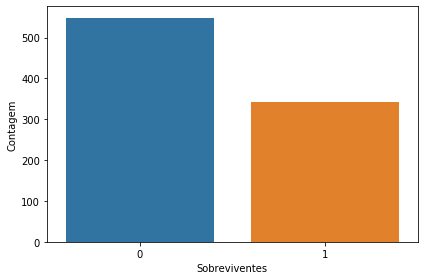

In [13]:
sns.countplot(data=dados_train,  x="Survived")
plt.xlabel('Sobreviventes')
plt.ylabel('Contagem')
plt.tight_layout()

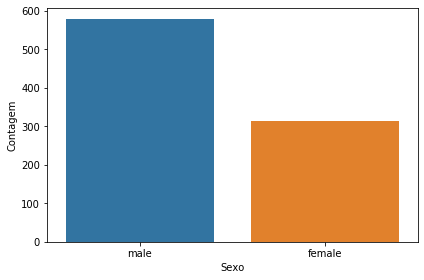

In [14]:
sns.countplot(data=dados_train,  x="Sex")
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.tight_layout()

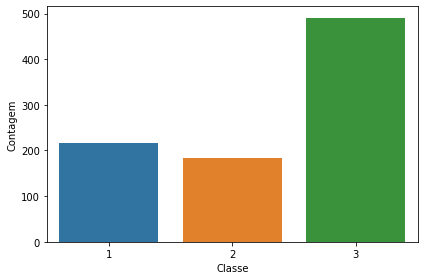

In [15]:
sns.countplot(data=dados_train,  x="Pclass")
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.tight_layout()

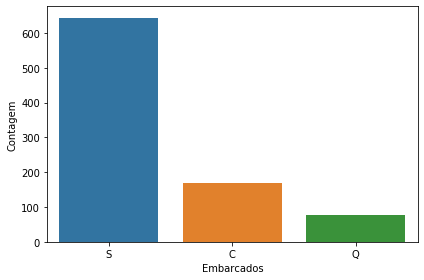

In [16]:
sns.countplot(data=dados_train,  x="Embarked")
plt.xlabel('Embarcados')
plt.ylabel('Contagem')
plt.tight_layout()

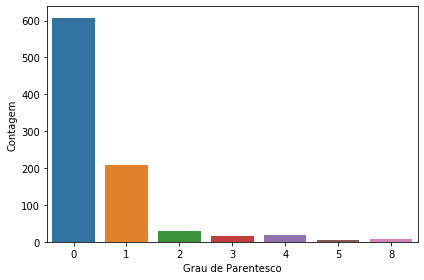

In [17]:
sns.countplot(data=dados_train,  x="SibSp")
plt.xlabel('Grau de Parentesco')
plt.ylabel('Contagem')
plt.tight_layout()

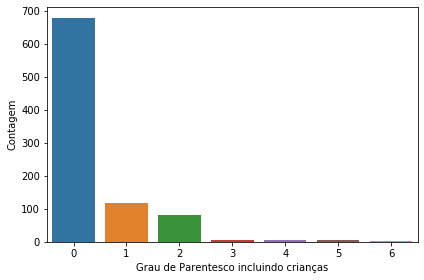

In [18]:
sns.countplot(data=dados_train,  x="Parch")
plt.xlabel('Grau de Parentesco incluindo crianças')
plt.ylabel('Contagem')
plt.tight_layout()

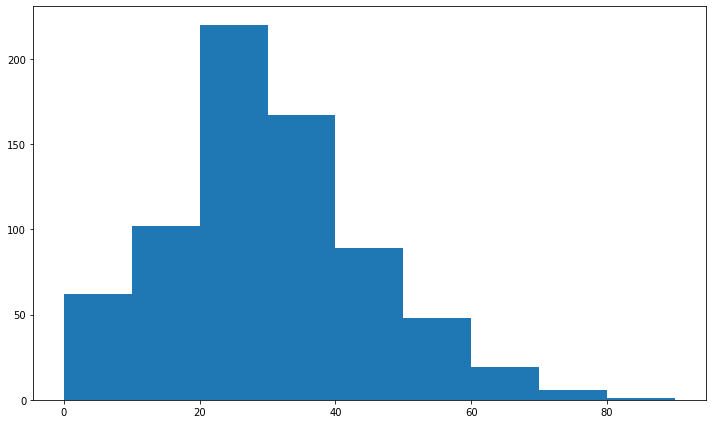

In [19]:
bins_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
plt.figure(figsize=(10,6))
plt.hist(dados_train['Age'], bins=bins_list)
plt.tight_layout()

In [20]:
def bar_chart(feature):
    survived = dados_train[dados_train['Survived']==1][feature].value_counts()
    dead = dados_train[dados_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(15,7))
    plt.xticks(rotation=0)

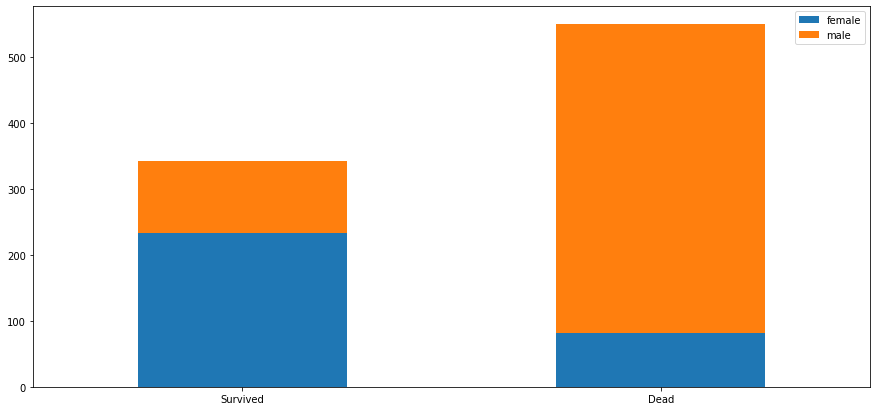

In [21]:
bar_chart('Sex')

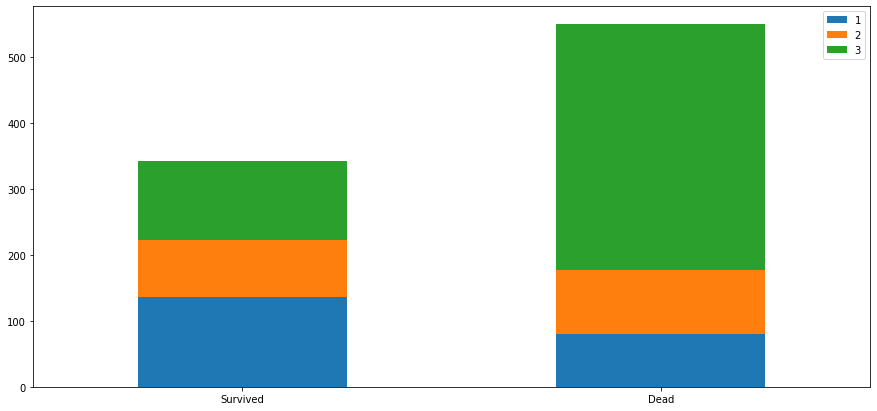

In [22]:
bar_chart('Pclass')

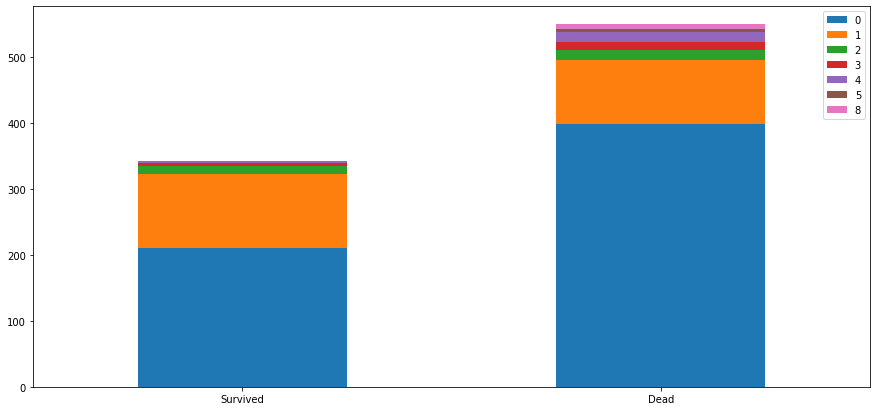

In [23]:
bar_chart('SibSp')

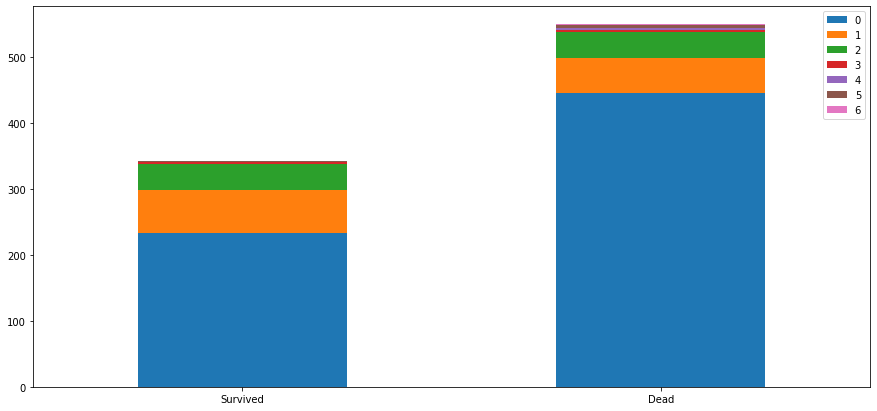

In [24]:
bar_chart('Parch')

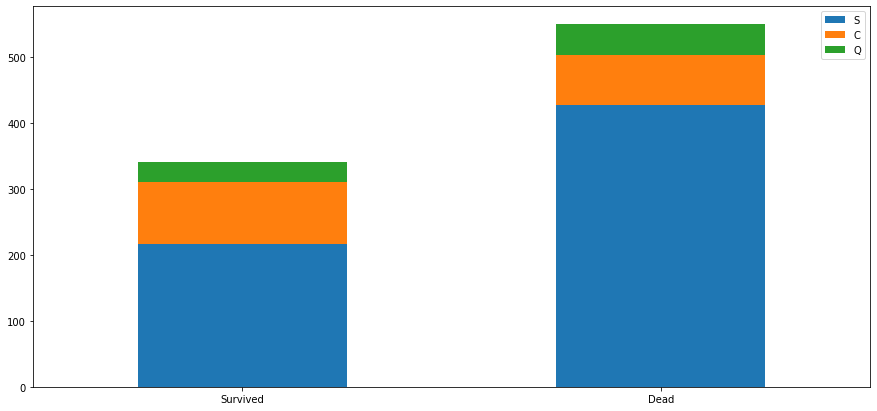

In [25]:
bar_chart('Embarked')

In [26]:
def dummie_sexo(dataset):
    if dataset == 'female':
        return 0
    else:
        return 1

In [27]:
def categorical_embark(dataset):
    if dataset == 'S':
        return 0
    elif dataset == 'C':
        return 1
    else:
        return 2

In [28]:
dados_train['Sex'] = dados_train['Sex'].apply(dummie_sexo)
dados_test['Sex'] = dados_test['Sex'].apply(dummie_sexo)

In [29]:
dados_train['Embarked'] = dados_train['Embarked'].apply(categorical_embark)
dados_test['Embarked'] = dados_test['Embarked'].apply(categorical_embark)

In [30]:
dados_train.update(dados['Age'].fillna(math.floor(dados_train['Age'].mean())))
dados_test.update(dados_test['Age'].fillna(math.floor(dados_test['Age'].mean())))
dados_test.update(dados_test['Fare'].fillna(math.floor(dados_test['Fare'].mean())))

In [31]:
"""dados_train['Miss'] = dados_train['Name'].str.contains('Miss').astype(int)
dados_train['Mr'] = dados_train['Name'].str.contains('Mr').astype(int)
dados_train['Mrs'] = dados_train['Name'].str.contains('Mrs').astype(int)
dados_train['Master'] = dados_train['Name'].str.contains('Master').astype(int)
dados_train['Col'] = dados_train['Name'].str.contains('Col').astype(int)
dados_train['Major'] = dados_train['Name'].str.contains('Major').astype(int)

dados_test['Miss'] = dados_test['Name'].str.contains('Miss').astype(int)
dados_test['Mr'] = dados_test['Name'].str.contains('Mr').astype(int)
dados_test['Mrs'] = dados_test['Name'].str.contains('Mrs').astype(int)
dados_test['Master'] = dados_test['Name'].str.contains('Master').astype(int)
dados_test['Col'] = dados_test['Name'].str.contains('Col').astype(int)
dados_test['Major'] = dados_test['Name'].str.contains('Major').astype(int)"""

"dados_train['Miss'] = dados_train['Name'].str.contains('Miss').astype(int)\ndados_train['Mr'] = dados_train['Name'].str.contains('Mr').astype(int)\ndados_train['Mrs'] = dados_train['Name'].str.contains('Mrs').astype(int)\ndados_train['Master'] = dados_train['Name'].str.contains('Master').astype(int)\ndados_train['Col'] = dados_train['Name'].str.contains('Col').astype(int)\ndados_train['Major'] = dados_train['Name'].str.contains('Major').astype(int)\n\ndados_test['Miss'] = dados_test['Name'].str.contains('Miss').astype(int)\ndados_test['Mr'] = dados_test['Name'].str.contains('Mr').astype(int)\ndados_test['Mrs'] = dados_test['Name'].str.contains('Mrs').astype(int)\ndados_test['Master'] = dados_test['Name'].str.contains('Master').astype(int)\ndados_test['Col'] = dados_test['Name'].str.contains('Col').astype(int)\ndados_test['Major'] = dados_test['Name'].str.contains('Major').astype(int)"

In [32]:
dados_train['Cabin'] = dados_train['Cabin'].replace(np.nan, 'sem')
dados_test['Cabin'] = dados_test['Cabin'].replace(np.nan, 'sem')

In [33]:
"""dados_train['Cabin_A'] = dados_train['Cabin'].str.contains('A').astype(int)
dados_train['Cabin_B'] = dados_train['Cabin'].str.contains('B').astype(int)
dados_train['Cabin_C'] = dados_train['Cabin'].str.contains('C').astype(int)
dados_train['Cabin_D'] = dados_train['Cabin'].str.contains('D').astype(int)
dados_train['Cabin_E'] = dados_train['Cabin'].str.contains('E').astype(int)
dados_train['Cabin_F'] = dados_train['Cabin'].str.contains('F').astype(int)

dados_test['Cabin_A'] = dados_test['Cabin'].str.contains('A').astype(int)
dados_test['Cabin_B'] = dados_test['Cabin'].str.contains('B').astype(int)
dados_test['Cabin_C'] = dados_test['Cabin'].str.contains('C').astype(int)
dados_test['Cabin_D'] = dados_test['Cabin'].str.contains('D').astype(int)
dados_test['Cabin_E'] = dados_test['Cabin'].str.contains('E').astype(int)
dados_test['Cabin_F'] = dados_test['Cabin'].str.contains('F').astype(int)"""

"dados_train['Cabin_A'] = dados_train['Cabin'].str.contains('A').astype(int)\ndados_train['Cabin_B'] = dados_train['Cabin'].str.contains('B').astype(int)\ndados_train['Cabin_C'] = dados_train['Cabin'].str.contains('C').astype(int)\ndados_train['Cabin_D'] = dados_train['Cabin'].str.contains('D').astype(int)\ndados_train['Cabin_E'] = dados_train['Cabin'].str.contains('E').astype(int)\ndados_train['Cabin_F'] = dados_train['Cabin'].str.contains('F').astype(int)\n\ndados_test['Cabin_A'] = dados_test['Cabin'].str.contains('A').astype(int)\ndados_test['Cabin_B'] = dados_test['Cabin'].str.contains('B').astype(int)\ndados_test['Cabin_C'] = dados_test['Cabin'].str.contains('C').astype(int)\ndados_test['Cabin_D'] = dados_test['Cabin'].str.contains('D').astype(int)\ndados_test['Cabin_E'] = dados_test['Cabin'].str.contains('E').astype(int)\ndados_test['Cabin_F'] = dados_test['Cabin'].str.contains('F').astype(int)"

In [34]:
def reescrevendo(subconjunto):
    num = set('ABCDEFGHIJLM')
    lista = []
    for j in range(len(subconjunto)):            
        if subconjunto[j] in num:
            lista.append(subconjunto[j])
        #else:
            #lista.append('sem')
    res = (''.join(lista))
     
    return res

In [35]:
def titulo_separando(subconjunto):
    if 'Miss' in subconjunto:
        return 0
    elif 'Mr.' in subconjunto:
        return 1
    elif 'Mrs.' in subconjunto:
        return 2
    else:
        return 3

In [36]:
dados_train['Title'] = dados_train['Name'].apply(titulo_separando)
dados_test['Title'] = dados_test['Name'].apply(titulo_separando)

In [37]:
dados_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,sem,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,sem,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,sem,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,sem,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.0,1,2,W./C. 6607,23.4500,sem,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1,1


In [38]:
dados_train['Cabin'] = dados_train['Cabin'].apply(reescrevendo)
dados_test['Cabin'] = dados_test['Cabin'].apply(reescrevendo)

In [39]:
dados_train['Cabin'] = dados_train['Cabin'].astype('category')
dados_train['Cabin'] = dados_train['Cabin'].cat.codes

dados_test['Cabin'] = dados_test['Cabin'].astype('category')
dados_test['Cabin'] = dados_test['Cabin'].cat.codes

In [40]:
dados_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,6,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,6,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.0,1,2,W./C. 6607,23.4500,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,6,1,1


In [41]:
correlacao = dados_train.corr()
target = 'Survived'
corr = correlacao.loc[((correlacao[target] < 0.9) & (correlacao[target] > 0.1)) | ((correlacao[target] > - 0.9) & (correlacao[target] < - 0.1))]
manter = list(corr.index)

In [42]:
manter

['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked']

In [43]:
y = dados_train['Survived']
X = dados_train[manter]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [45]:
models = ['Logistic Regression', 'SVC', 'K Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

In [46]:
accuracy_list = []

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  77.24%


C:\Users\Manoel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
# svc
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)
print(Fore.GREEN + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  75.37%


C:\Users\Manoel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  74.25%


In [50]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  75.37%


In [51]:
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  78.36%


C:\Users\Manoel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(X_train,y_train)
gradientboost_pred = gradientboost_clf.predict(X_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  79.10%


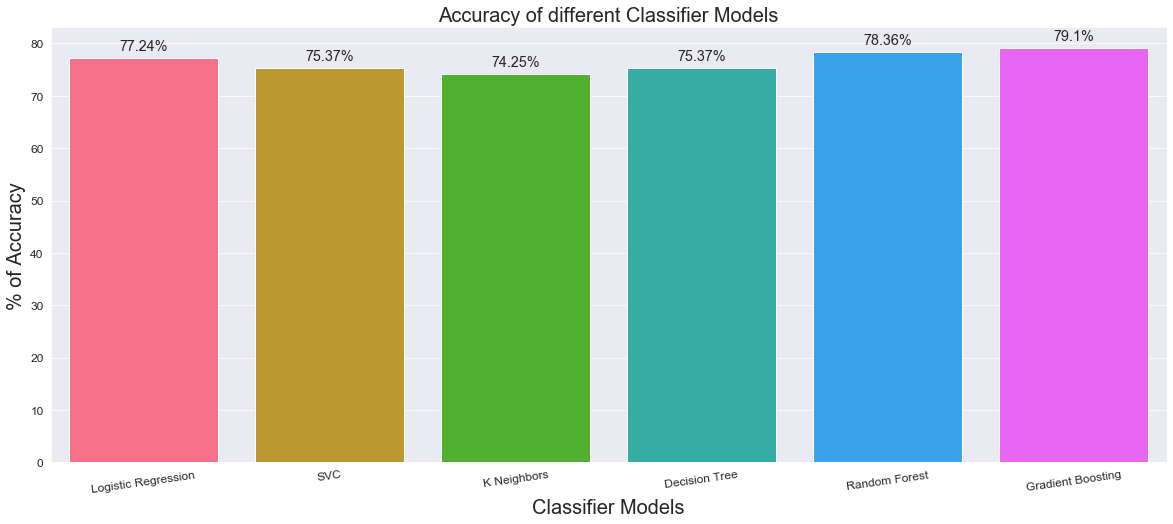

In [53]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [54]:
y = dados_train['Survived']
X = dados_train[manter]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [56]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.1],
    "min_samples_split": np.linspace(0.1, 0.5, 1, 2),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1, 2),
    "max_depth":[2, 5, 10, 15]
    }

In [57]:
gbc = GradientBoostingClassifier()

In [58]:
gbc_grid = GridSearchCV(gbc, parameters, scoring='accuracy', verbose=True)

In [59]:
gbc_grid.fit(X_train, y_train)

C:\Users\Manoel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    3.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_it...
                                                  presort='auto',
  

In [60]:
gbc_best = gbc_grid.best_estimator_
gbc_best

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.025, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
kf = KFold(n_splits=10)
outcomes = []
    
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    gbc_best.fit(X_train, y_train)
    predictions = gbc_best.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    outcomes.append(accuracy)
    print(f"Fold {fold} accuracy: {accuracy}")     
mean_outcome = np.mean(outcomes)
print(f"\nMean Accuracy: {mean_outcome}")

Fold 1 accuracy: 0.8111111111111111
Fold 2 accuracy: 0.8426966292134831
Fold 3 accuracy: 0.7640449438202247
Fold 4 accuracy: 0.8202247191011236
Fold 5 accuracy: 0.8314606741573034
Fold 6 accuracy: 0.8202247191011236
Fold 7 accuracy: 0.7865168539325843
Fold 8 accuracy: 0.7528089887640449
Fold 9 accuracy: 0.8539325842696629
Fold 10 accuracy: 0.8202247191011236

Mean Accuracy: 0.8103245942571785


In [65]:
X = dados_test[manter]

In [66]:
X

,Pclass,Sex,Fare,Cabin,Embarked
0,3,1,7.8292,0,2
1,3,0,7.0000,0,0
2,2,1,9.6875,0,2
3,3,1,8.6625,0,0
4,3,0,12.2875,0,0
...,...,...,...,...,...
413,3,1,8.0500,0,0
414,1,0,108.9000,6,1
415,3,1,7.2500,0,0
416,3,1,8.0500,0,0


In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Fare        418 non-null float64
Cabin       418 non-null int8
Embarked    418 non-null int64
dtypes: float64(1), int64(3), int8(1)
memory usage: 13.5 KB


In [68]:
predictions = gbc_best.predict(X)

In [69]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [70]:
dados_test['Survived'] = predictions

In [71]:
dados_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,2,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,2,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.0,0,0,A.5. 3236,8.0500,0,0,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,6,1,3,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,0,1,0
416,1308,3,"Ware, Mr. Frederick",1,30.0,0,0,359309,8.0500,0,0,1,0


In [72]:
output = dados_test[['PassengerId', 'Survived']]

In [73]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
output.to_csv('C:/Users/Manoel/Documents/GitHub/Titanic/output/output.csv', index = False)